#### Convexe cost functions, globaal minimum
Referentie: [Difference between convex and non-convex cost function | Medium](https://medium.com/@divine_inner_voice/difference-between-convex-and-non-convex-cost-function-what-does-it-mean-when-a-cost-function-is-b781c38663c6)

Laten we dieper ingaan op hoe we de bias en gewichten aanpassen om de optimale instellingen voor ons model te verkrijgen, wat resulteert in verbeterde voorspelde waarden.

Stel je een grafiek voor waarbij de y-as de loss vertegenwoordigt en de x-as de gewichten van ons model zijn. Met convexe loss functies creëren we een parabool bij het berekenen van de loss. Convexe functies zijn altijd bolvormig. Het lijnsegment tussen twee willekeurige punten op de grafiek van de functie boven of op de grafiek van de functie ligt, en niet eronder (zie visualisatie). We focussen nu op tweedimensionale convexe lossfuncties met één parameter, het gewicht.

Convexe functies, zoals een parabool, hebben slechts één globale minimum: een punt waar de helling precies nul is, wat zich visualiseert als een rechte horizontale lijn. Met dit punt, waar de lossfunctie minimaal is, kunnen we het convergentiepunt van het gewicht vinden voor de minimale loss.

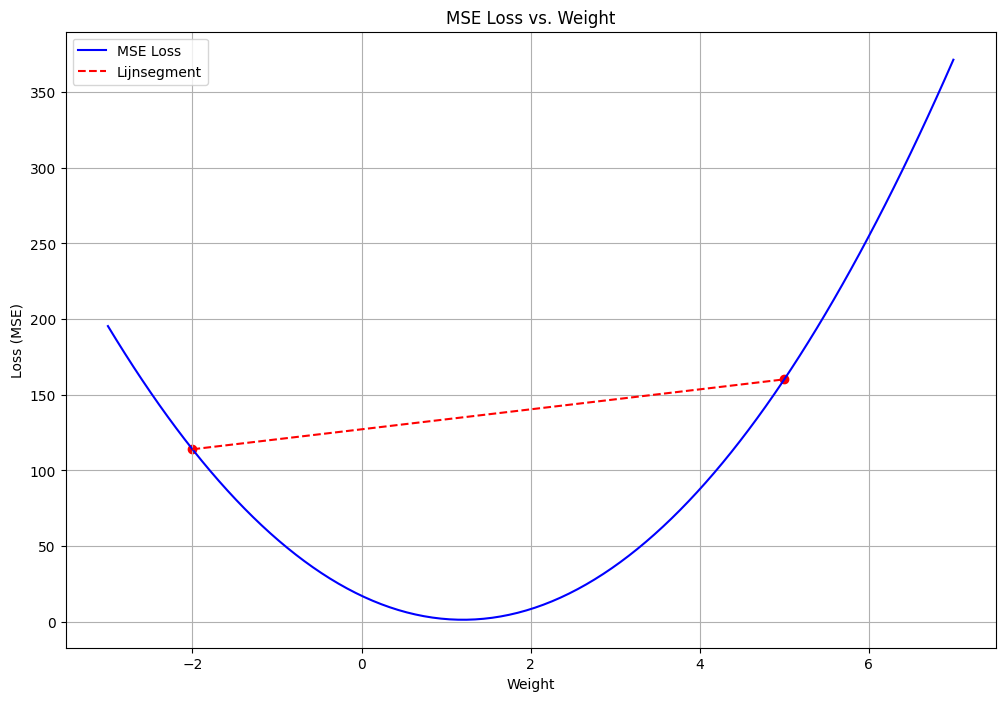

In [ ]:
# @title Convexe cost function surfaces, tweedimentionaal
# @markdown **Hier zijn twee voorbeelden van convexe cost functions die we kunnen bekijken.**
import numpy as np
import matplotlib.pyplot as plt

# Functie om Mean Squared Error (MSE) te berekenen
def mean_squared_error(true_labels, predicted_labels):
    return np.mean((true_labels - predicted_labels) ** 2)

# Genereer voorbeeldgegevens
X = np.array([1, 2, 3, 4, 5])  # Feature
Y = np.array([2, 4, 5, 4, 5])  # Labels

# Bereken MSE voor verschillende waarden van de gewichtsparameter
weights = np.linspace(-3, 7, 100)  # Bereik van gewichtswaarden
mse_loss = []

for w in weights:
    predicted_labels = w * X  # Voorspelde labels met huidige gewicht
    mse = mean_squared_error(Y, predicted_labels)
    mse_loss.append(mse)

# Selecteer twee punten aan weerszijden van de grafiek om het lijnsegment te tekenen
w1, w2 = -2, 5
mse1, mse2 = mean_squared_error(Y, w1 * X), mean_squared_error(Y, w2 * X)

# Genereer gewichten voor het lijnsegment
weights_line = np.linspace(w1, w2, 100)
# Lineaire interpolatie voor het lijnsegment
mse_line = mse1 + (weights_line - w1) * (mse2 - mse1) / (w2 - w1)

# Plot de MSE loss functie
plt.figure(figsize=(10, 6))
plt.plot(weights, mse_loss, label='MSE Loss', color='blue')

# Voeg het lijnsegment toe
plt.plot(weights_line, mse_line, linestyle='--', color='red', label='Lijnsegment')

# Extra punten op het lijnsegment
plt.scatter([w1, w2], [mse1, mse2], color='red', marker='o')

plt.title('MSE Loss vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


$f(x)=x
4
 −8x
2
 +5x
 $

Naast convexe cost functions zijn er ook non-convexe cost functions waarbij niet één globale minimum maar ook meerdere lokale minima. Het lijnsegment tussen twee punten op de grafiek van de functie kan op sommige plaatsen onder de grafiek liggen, waardoor heuvels en valleien ontstaan (zie visualisatie). Dit kan leiden tot suboptimale resultaten omdat het optimalisatie-algoritme kan vastlopen in een lokaal minimum, wat niet het laagste punt is in de cost function. Dit kan de zoektocht naar het optimale punt bemoeilijken omdat het algoritme denkt dat het het minimum heeft bereikt.

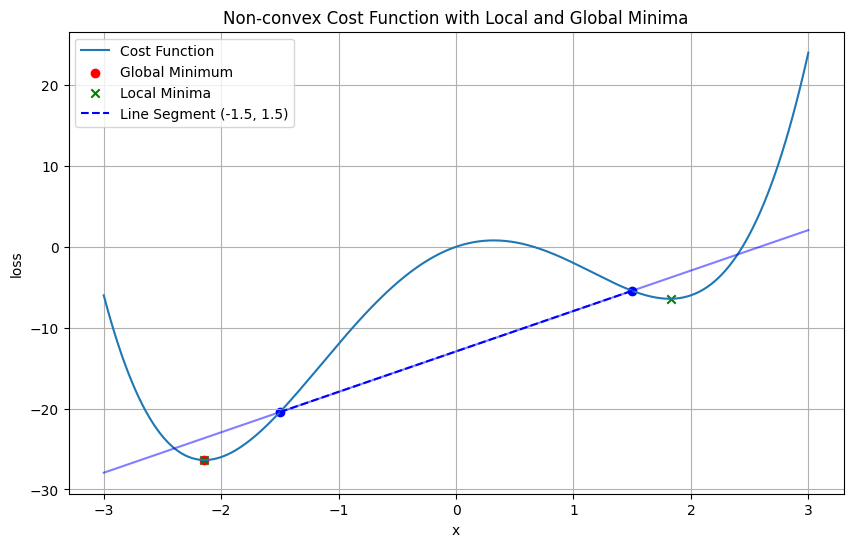

In [ ]:
# @title Non-convexe cost funtion met globale en lokale minimum
import numpy as np
import matplotlib.pyplot as plt

# Definieer de niet-convexe kostenfunctie
def loss_function(x):
    return x**4 - 8*x**2 + 5*x

# Genereer x-waarden voor de plot
x = np.linspace(-3, 3, 400)
y = loss_function(x)

# Vind de globale minimale en lokaal minimale punten
global_minimum = np.argmin(y)
local_minima = np.where(np.diff(np.sign(np.diff(y))) > 0)[0] + 1

# Kies twee punten aan weerszijden van de "heuvel"
x1, x2 = -1.5, 1.5
y1, y2 = loss_function(np.array([x1, x2]))

# Genereer x-waarden voor het lijnsegment
x_line_segment = np.linspace(x1, x2, 400)
# Lineaire interpolatie voor het lijnsegment
y_line_segment = y1 + (x_line_segment - x1) * (y2 - y1) / (x2 - x1)

# Plot de kostenfunctie
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Cost Function')
plt.scatter(x[global_minimum], y[global_minimum], color='r', marker='o', label='Global Minimum')
plt.scatter(x[local_minima], y[local_minima], color='g', marker='x', label='Local Minima')

# Voeg het rechte lijnsegment toe
plt.plot(x_line_segment, y_line_segment, linestyle='--', color='b', label='Line Segment (-1.5, 1.5)')

# Extra punten op het lijnsegment
plt.scatter([x1, x2], [y1, y2], color='b', marker='o')

# Highlight het gebied waar de functie onder het lijnsegment ligt
for i in range(len(x_line_segment)):
    if loss_function(x_line_segment[i]) < y_line_segment[i]:
        plt.scatter(x_line_segment[i], loss_function(x_line_segment[i]), color='orange', s=10)

# Trek het lijnsegment door
plt.plot([-3, 3], [y1 - (x1 + 3) * (y2 - y1) / (x2 - x1), y2 + (3 - x2) * (y2 - y1) / (x2 - x1)], linestyle='-', color='b', alpha=0.5)

plt.xlabel('x')
plt.ylabel('loss')
plt.title('Non-convex Cost Function with Local and Global Minima')
plt.legend()
plt.grid(True)
plt.show()


***
# Resultaten

**Inleiding**

Na het verkennen van cruciale begrippen die van belang zijn voor het oplossen van het probleem, is het nu tijd om onze resultaten te presenteren. Deze resultaten zullen antwoord geven op de deelvragen die we hebben gesteld, waardoor we in de conclusie de hoofdvraag kunnen beantwoorden.

Hier zijn de resultaten voor elke deelvraag:

1. **Wat zijn de fundamentele bouwstenen van een neuraal netwerk en hoe dragen ze bij aan het leerproces?**
   - De fundementale bouwstenen van een neuraal netwerk bestaan uit neuronen, gewichten en bias, activatiefuncties, en lagen. Neuronen verwerken de input door deze te combineren met gewichten, waarna het resultaat door een activatiefunctie gaat en de uitkomst naar de volgende laag wordt gestuurd. Een volledige doorgang van input naar output wordt een forward pass genoemd. Deze elementen zijn cruciaal voor het trainingsproces van neurale netwerken, waarbij de gewichten en bias worden bijgesteld. Het trainingsproces is een iteratieve methode van trial en error, waarbij gradient descent wordt gebruikt om de hyperparameters te finetunen tijdens backpropagation. Dit proces geeft feedback aan het netwerk, wat leidt tot verbeterde resultaten en een vermindering van de foutmarge bij de volgende forward pass.

2. **Welke manieren zijn er om een beeldherkenningsmodel te trainen en wat zijn de voorwaarden om deze uit te voeren?**
   - Beeldherkenningsalgoritmen kunnen worden ontwikkeld door middel van supervised learning en unsupervised learning. Bij supervised learning is er een noodzaak voor vooraf gelabelde data om het model te trainen. In tegenstelling tot supervised learning, vereist unsupervised learning geen vooraf gedefinieerde labels. Transfer learning maakt gebruik van vooraf getrainde beeldherkenningsmodellen zoals Faster R-CNN met ResNet-50 en Feature Pyramid Network (FPN), die gebaseerd kunnen zijn op zowel supervised als unsupervised. Enkele vereisten voor het trainen van deze modellen zijn een voldoende hoeveelheid trainingsdata, datasets die de realiteit goed weergeven, en de selectie van een passend algoritme.


3. **Welke metrieken zijn geschikt om de nauwkeurigheid van het beeldherkenningssysteem te waarborgen?**
   - Om de nauwkeurigheid van het beeldherkenningssysteem te waarborgen, zijn diverse metrieken geïdentificeerd die essentieel zijn voor een grondige evaluatie. De metrieken die als geschikt worden beschouwd, omvatten:

    - **Precisie**: Deze metriek geeft aan hoeveel van de door het systeem als positief geïdentificeerde gevallen daadwerkelijk positief zijn. Het is een indicatie van de kwaliteit van de positieve voorspellingen van het systeem.

    - **Recall**: Ook bekend als sensitiviteit, meet deze metriek het vermogen van het systeem om alle relevante gevallen binnen een dataset correct te identificeren.

    - **F1-score**: Deze score combineert precisie en recall in een enkele metriek, die een balans biedt tussen de twee en nuttig is wanneer een evenwichtige prestatie belangrijk is.

    - **Confusion Matrix**: Deze matrix biedt een gedetailleerd overzicht van de prestaties van het systeem, door niet alleen de juiste voorspellingen (TP en TN) te tonen, maar ook de fouten (FP en FN).

    Als logging tool bestaat er ook tensorboard //

    Deze metrieken maken gebruik van de termen True Positives (TP), False Positives (FP), True Negatives (TN), en False Negatives (FN), die samen een kwantitatieve basis vormen voor het beoordelen van de prestaties van het systeem. Door deze metrieken toe te passen, kunnen wij inzicht krijgen in zowel de sterke punten als de beperkingen van het beeldherkenningssysteem, en zo bijdragen aan de continue verbetering van de nauwkeurigheid.

4. **Welke maatregelen kunnen genomen worden om de nauwkeurigheid van het beeldherkenningsmodel te verhogen?**
   - Om de nauwkeurigheid van een beeldherkenningsmodel te verbeteren, zijn er verschillende maatregelen mogelijk. Dit omvat het uitbreiden van de trainingsdataset met meer real-life voorbeelden en extra context, zoals het toevoegen van labels voor elementen zoals netscheidingen en voedende velden. Ook is het toepassen van data-augmentatie essentieel om de variabiliteit van de gegevens te vergroten. Daarnaast is het optimaliseren van hyperparameters door middel van gradient descent en gerelateerde methoden cruciaal. Het gebruik van technieken zoals momentum en adaptieve leersnelheid kan helpen om problemen met niet-convexe functies in neurale netwerken te omzeilen. Ten slotte is het regelmatig controleren en updaten van het model van groot belang.

5. **Wat zijn de vereisten en uitdagingen bij de classificatie van geschakelde velden middels beeldherkenning?**
   - Voor de classificatie van geschakelde velden met beeldherkenning zijn de volgende vereisten essentieel:

    1. Nauwkeurige detectie van objecten met zowel gezekerde als niet-gezekerde labels door middel van een goed getraind model, zoals een convolutioneel neuraal netwerk (CNN).
    2. Het vermogen om variabele omstandigheden en weerspiegelingen te weerstaan door gebruik te maken van data-augmentatie.
    3. Het onderscheiden van relevante informatie van achtergrondruis, zoals occlusie.

    Een van de uitdagingen is het correct onderscheiden van gezekerde en niet-gezekerde velden. Door eerst de smeltpatronen zelf te detecteren, kunnen we een onderscheid maken tussen deze twee soorten velden. Dit kan worden bereikt door de output van de voorspellingen van de smeltpratronen te gebruiken om boundingboxen te tekenen rond de velden waar drie smeltpartonen zijn gevonden. Dit helpt bij de detectie en classificatie van gezekerde velden.


6. **Welke frameworks en technologieën zijn het meest geschikt voor de ontwikkeling van een beeldherkenningssysteem?**
   - Geschikte frameworks en technologieën voor de ontwikkeling van een beeldherkenningssysteem zijn onder andere TensorFlow, PyTorch, Keras en OpenCV. Deze tools bieden krachtige functies voor het bouwen, trainen en implementeren van beeldherkenningsmodellen.

7. **Hoe kan de dataset van Alliander het beste worden voorbereid voor training en validatie van het beeldherkenningssysteem?**
   - De dataset van Alliander kan het beste worden voorbereid voor training en validatie door het uitvoeren van data cleaning, data augmentation, het labelen van de gegevens, het opsplitsen van de dataset in trainings- en validatiesets, en het zorgen voor een evenwichtige verdeling van de klassen. Het annoteren en labelen wordt gedaan door bounding boxen om de data voor te bereiden voor het trainen van het model voor supervised learning en toegepaste pretrained model

8. **Wat zijn de prestatiecriteria voor het beeldherkenningssysteem?**
   - Prestatiecriteria voor het beeldherkenningssysteem omvatten nauwkeurigheid, snelheid van verwerking, robuustheid ten opzichte van variabele omstandigheden, schaalbaarheid, en de mogelijkheid tot real-time detectie en classificatie van objecten. Deze criteria bepalen de effectiviteit en bruikbaarheid van het systeem in de praktijk.

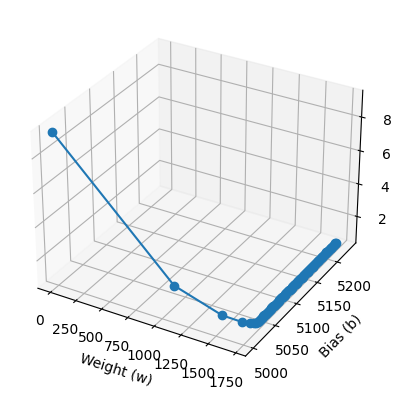

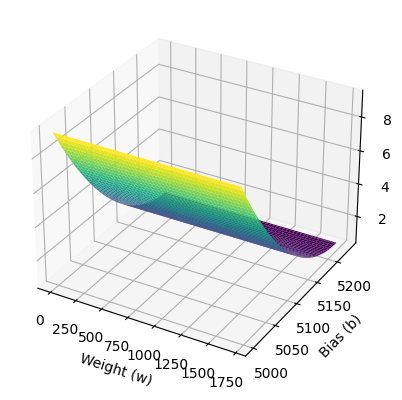

Converged values:
Weight (w): 1709.857727114119
Bias (b): 5233.396269421178
Prediction Loss (MSE): 531429926.36094344
Voor een huis van 50 jaar oud:
Voorspelde prijs: $90726.28
Werkelijke prijs: $103220.74


In [ ]:
# @title Gradient Descent met Mean Squared Error Surface
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Bereken de MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Bereken de voorspelling van ons model
def predict(x, w, b):
    return w * x + b

# Genereer de dummy data voor huisleeftijd en huisprijs
np.random.seed(0)
num_samples = 100
house_age = np.random.randint(1, 100, num_samples)  # Bouwjaar van het huis
house_price = 50000 + 1000 * house_age + np.random.normal(0, 10000, num_samples)  # Prijs van het huis

# Initialisatie van w en b
# Definieer de initiële waarden voor gewicht (helling) en bias (afsnijding)
w = 0.5
b = 5000
dw = 0
db = 0

# Lijsten om de MSE, w en b op te slaan tijdens het trainen
mse_values = []
w_values = []
b_values = []
dw_values = []
db_values = []

# Training met gradient descent
learning_rate = 0.0001
epochs = 100

for epoch in range(epochs):
    y_pred = predict(house_age, w, b)
    mse_value = mse(house_price, y_pred)
    mse_values.append(mse_value)
    w_values.append(w)
    b_values.append(b)
    dw_values.append(dw)
    db_values.append(db)

    # Bereken de partiële afgeleiden
    dw = -2 * np.mean((house_price - y_pred) * house_age)
    db = -2 * np.mean(house_price - y_pred)

    # Update w en b
    w -= learning_rate * dw
    b -= learning_rate * db

# Plot de MSE in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(w_values, b_values, mse_values, marker='o')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Mean Squared Error (MSE)')

plt.show()

# Bereik van w en b
w_min, w_max = min(w_values), max(w_values)
b_min, b_max = min(b_values), max(b_values)

# Creëer een rooster van w- en b-waarden
num_points = 100
w_range = np.linspace(w_min, w_max, num_points)
b_range = np.linspace(b_min, b_max, num_points)
w_grid, b_grid = np.meshgrid(w_range, b_range)

# Bereken de MSE-waarden voor elk paar w en b
mse_surface = np.zeros_like(w_grid)
for i in range(len(w_range)):
    for j in range(len(b_range)):
        mse_surface[i, j] = mse(house_price, predict(house_age, w_range[i], b_range[j]))


# Plot de kostenoppervlakte in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_grid, b_grid, mse_surface, cmap='viridis')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Mean Squared Error (MSE)')
plt.show()

# Print de prediction loss samen met de geconvergeerde waarden van w en b
print("Converged values:")
print("Weight (w):", w)
print("Bias (b):", b)
print("Prediction Loss (MSE):", mse_values[-1])

# Maak een voorspelling met de geoptimaliseerde w en b
new_house_age = 50  # Voorbeeldleeftijd van het huis
predicted_price = predict(new_house_age, w, b)
# Zoek de werkelijke prijs op basis van de leeftijd van het huis
actual_price = house_price[np.where(house_age == new_house_age)][0]

# Print zowel de voorspelde prijs als de werkelijke prijs
print("Voor een huis van {} jaar oud:".format(new_house_age))
print("Voorspelde prijs: ${:.2f}".format(predicted_price))
print("Werkelijke prijs: ${:.2f}".format(actual_price))



